Machine learning (ML) is the study of computer algorithms that improve automatically through experience.Machine learning algorithms build a model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so. We would build a model to preict insurance charges for a person based on his age, body paramaters, family members etc. We would use public open source dataset and build a model around 80% of data and test our model from remaining 20%. We will build several models and compare them using standrad metrics that will help us choose the best one among them.
---

In [77]:

#Step1 : Load Numpy and Panda
import numpy as np
import pandas as pd

#Step2 : Load Dataset
insurance_cost_df = pd.read_csv("https://raw.githubusercontent.com/PKohli876/Machine-Learning---Insurance-Cost/main/INSAID%20Project%20-%20ML%20-Insurance%20Cost%20Data_pankaj.kohli%40gmail.com.csv")
insurance_cost_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Before working on any data , its cleaning and redeiation is important. It is important to find outliers and eliminate them.
For model evaluation using Machine learning, it is important to identify output variable and independent variables upon which the output variales would dependent upon.
Use co-relation between each param. The one with less co-relation value may be droped and excluded from model development.
All independent variables need to be classified as categorical and numerical.
We need to convert categorical variables into nuerical dummies use One Hot Encoding.

In [78]:
#Step 3 : Clean Data
#Step 3 a) Catagorize catagorical columns, use One Hot Encoding to get encoded forms
catagorical_features = ['sex','smoker']
insurance_cost_df = pd.get_dummies(insurance_cost_df, columns= catagorical_features)
print(insurance_cost_df)

#Step 3 b) drop Columns not requried in model
drop_columns = ['region']
insurance_cost_df = insurance_cost_df.drop(drop_columns,axis=1)
print(insurance_cost_df)


      age     bmi  children  ... sex_male  smoker_no  smoker_yes
0      19  27.900         0  ...        0          0           1
1      18  33.770         1  ...        1          1           0
2      28  33.000         3  ...        1          1           0
3      33  22.705         0  ...        1          1           0
4      32  28.880         0  ...        1          1           0
...   ...     ...       ...  ...      ...        ...         ...
1333   50  30.970         3  ...        1          1           0
1334   18  31.920         0  ...        0          1           0
1335   18  36.850         0  ...        0          1           0
1336   21  25.800         0  ...        0          1           0
1337   61  29.070         0  ...        0          0           1

[1338 rows x 9 columns]
      age     bmi  children  ...  sex_male  smoker_no  smoker_yes
0      19  27.900         0  ...         0          0           1
1      18  33.770         1  ...         1          1          

In [79]:



#Step4 : Crate dataset X with list of independent variable
X = insurance_cost_df.loc[:,insurance_cost_df.columns != 'charges']
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,1,0,0,1
1,18,33.770,1,0,1,1,0
2,28,33.000,3,0,1,1,0
3,33,22.705,0,0,1,1,0
4,32,28.880,0,0,1,1,0


In [80]:
#Step 5 : Crate dataset Y with Dependent or target variable
Y = insurance_cost_df.charges

Once we are done with cleaing , One hot encoding, and classification into independent avriables and dependent variables, we need to split our dataset into two parts:
1. Training Data: A significant chunk of rows would be used to define a model.If we use all available rows to define a model, we may need another set of data to evalute accuracy of model. Usually models had a large set of rows and around 75% to 80% of data gives simialr accuracy as entire set. We use 75% to 80% of data to develop our model
2. Test data: The remaining rows that are not included to develop model, are used to etst our data. Values coming from our model will be comapred with out variable available in test data to evaluate accuracy of our model.

In [81]:
#Step 6: Spilt X and Y into training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes
216    53  26.600         0           1         0          1           0
731    53  21.400         1           0         1          1           0
866    18  37.290         0           0         1          1           0
202    60  24.035         0           1         0          1           0
820    45  33.700         1           0         1          1           0
...   ...     ...       ...         ...       ...        ...         ...
715    60  28.900         0           0         1          1           0
905    26  29.355         2           1         0          1           0
1096   51  34.960         2           1         0          0           1
235    40  22.220         2           1         0          0           1
1061   57  27.940         1           0         1          1           0

[1070 rows x 7 columns]
      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes
559    19  35.530         

In [82]:

#Step 7: Create and fit model
from sklearn.linear_model import LinearRegression
logreg = LinearRegression()
model = logreg.fit(X_train,Y_train)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [83]:
#Step 8: Predict Test Model
y_pred_test = logreg.predict(X_test) 
print(y_pred_test)

[ 4100.43282559 12693.04261163 12808.93825952 13634.43104889
   989.14106269 31836.69901918 13260.4556974  11773.1368127
  3269.04728479 29967.12306097 11566.2943743  17589.21131852
  9102.82060306  8688.8759399   3506.91786571 10773.56765472
  3804.09391255  7297.86635221 15369.94892684 14725.96903573
 11923.73189064 33235.48924194  8931.10636446  9379.93704037
  2427.44626748  8013.19788493  9023.14928342 11151.71675937
  7960.88342028  3869.66401139 14376.0228159   6184.02836295
 34160.18316202 26767.56074434 33857.35566434  9459.19016445
 30637.57582122 27011.99400001 15477.04190131 33686.87698538
  6700.69819635 13820.11681384 11209.52515213 15310.65265643
  4609.12743162 12569.54322362  4697.63805101 29017.60068768
  7267.38694039 13713.78648559 13734.72880029 12664.19925768
  1770.5265761   9269.43300796 25525.26931937 10341.82186649
 34612.49992145 14788.99219801  2734.60538629  6122.88260813
  6917.91452046 14333.83960668 27396.60351579  3109.86305472
 15118.43194701 11007.692

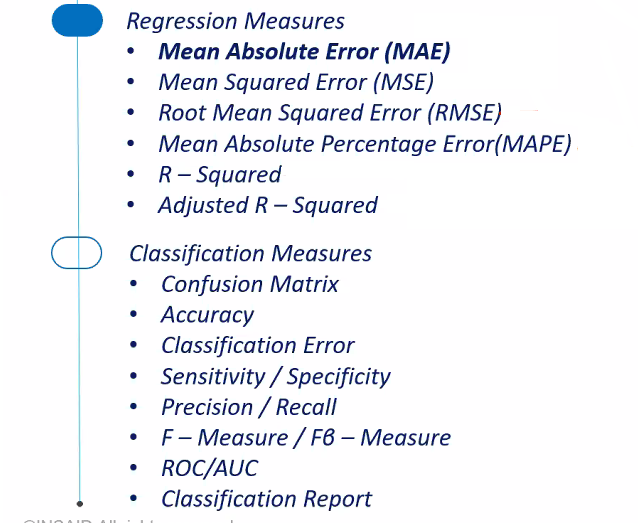

In [84]:
#Step 9: Evaluate Model
ModelMetrics = pd.DataFrame(columns=['Model','DatasetType','MSE', 'RMSE', 'R Square','Adjusted R Sqaure'])
#Step 9 a: Calculate R-Score
from sklearn.metrics import r2_score
r2_score_test = r2_score(Y_test,y_pred_test)
print('R2 Score for test data is:', r2_score_test)
#Step 9 b: Calculate adjusted R-score
SS_Residual = sum((Y_test-y_pred_test)**2)    
SS_Total = sum((Y_test-np.mean(Y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(Y_test)-1)/(len(Y_test)- X_test.shape[1]-1)
#Step 9 c: Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_test,y_pred_test,squared=0)
mse = mean_squared_error(Y_test,y_pred_test,squared=1)
print(mse,rmse,r_squared, adjusted_r_squared)
Model_dictorary ={'Model':"Model 1",'DatasetType': "Test", 'MSE':mse, 'RMSE':rmse,'R Square':r_squared, 'Adjusted R Sqaure': adjusted_r_squared}
ModelMetrics = ModelMetrics.append(Model_dictorary, ignore_index = True)

R2 Score for test data is: 0.7608581750738531
35699244.58251515 5974.884482775809 0.7608581750738532 0.7544197413258416


In [85]:
#Step 10 : Use Model to predict train data and compare the r2 score
y_pred_train = logreg.predict(X_train) 
print(y_pred_train)
r2_score_train = r2_score(Y_train,y_pred_train)
print('R2 Score for train data is:', r2_score_train)
SS_Residual_train = sum((Y_train-y_pred_train)**2)    
SS_Total_train = sum((Y_train-np.mean(Y_train))**2)     
r_squared_train = 1 - (float(SS_Residual_train))/SS_Total_train
adjusted_r_squared_train = 1 - (1-r_squared_train)*(len(Y_train)-1)/(len(Y_train)- X_train.shape[1]-1)

rmse_train = mean_squared_error(Y_train,y_pred_train,squared=0)
mse_train = mean_squared_error(Y_train,y_pred_train,squared=1)
Model_dictorary_train ={'Model':"Model 1",'DatasetType': "Train", 'MSE':mse_train, 'RMSE':rmse_train,'R Square':r_squared_train, 'Adjusted R Sqaure': adjusted_r_squared_train}
ModelMetrics = ModelMetrics.append(Model_dictorary_train, ignore_index = True)
display(ModelMetrics)

[10390.47468234  8975.054837    4378.90611318 ... 37003.17084878
 30279.37605289 12001.58140715]
R2 Score for train data is: 0.7466601137582649


,Model,DatasetType,MSE,RMSE,R Square,Adjusted R Sqaure
0,Model 1,Test,3.569924e+07,5974.884483,0.760858,0.75442
1,Model 1,Train,3.694935e+07,6078.597733,0.746660,0.74499


In [86]:
#Step 11: Improve model to increase r2 score
logreg_2 = LinearRegression(fit_intercept=1)
model2 = logreg_2.fit(X_train,Y_train,sample_weight=100)
model2_train_score = model2.score(X_train,Y_train)
model2_test_score = model2.score(X_test,Y_test)
print(model2_train_score, model2_test_score)

0.7466601137582649 0.7608581750738531


In [87]:
#No improvement in score 
#Model 1 will be chossen and will be imporved with usage

Now , we will take another example of Claasification and use various classification models to evaluate data.
We will use Mushroom dataset and evaluet if mushrooms are poisnous

**Poisnous Mushrooms**

In [88]:

df_mushroons = pd.read_csv('https://raw.githubusercontent.com/PKohli876/Machine-Learning-Insurance-Cost-Mushroom/main/mushrooms.csv')
df_mushroons.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [89]:
df_mushroons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [90]:
#Step 1: Define List of independent variables
y = df_mushroons['class']
X = df_mushroons.drop(columns=['class'],axis=1)
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [91]:
#Step 2: Use OHE to get Dummies for categorization fields
X = pd.get_dummies(X)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,...,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [92]:
#Step 3: Repalce e and P values in Y to Inetgeres:
y = y.replace({'e':0,'p':1})

In [93]:
#Step 4: Split Data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape , X_test.shape

((6499, 117), (1625, 117))

In [94]:
#Create a dataframe to store metrics for various models
ModelMetrics_Classification = pd.DataFrame(columns=['Model','DatasetType','Precision', 'Recall', 'F1Score','Accuracy'])

In [95]:
#Step 5: Create model using Logistic Regression 
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression().fit(X_train,y_train)
logisticRegression.score(X_train,y_train)

0.9998461301738729

In [96]:
y_logisticRegression_predict = logisticRegression.predict(X_test)

from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score, accuracy_score
logisticRegression_precision = precision_score(y_test, y_logisticRegression_predict)
logisticRegression_recall = recall_score(y_test, y_logisticRegression_predict)
logisticRegression_f1_score = f1_score(y_test, y_logisticRegression_predict)
logisticRegression_accuracy_score = accuracy_score(y_test, y_logisticRegression_predict)
print(logisticRegression_precision, logisticRegression_recall, logisticRegression_f1_score, logisticRegression_accuracy_score)

1.0 0.9962732919254659 0.9981331673926571 0.9981538461538462


In [97]:
logisticRegression_mterics = {'Model':"Logistic Regression",'DatasetType': "1",'Precision': logisticRegression_precision, 'Recall':  logisticRegression_recall, 'F1Score':  logisticRegression_f1_score,'Accuracy': logisticRegression_accuracy_score}
ModelMetrics_Classification = ModelMetrics_Classification.append(logisticRegression_mterics, ignore_index = True)
print(ModelMetrics_Classification)


                 Model DatasetType  Precision    Recall   F1Score  Accuracy
0  Logistic Regression           1        1.0  0.996273  0.998133  0.998154


In [98]:
#Step 6: Create model using Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier
decisionTreeClassifier = DecisionTreeClassifier().fit(X_train,y_train)
decisionTreeClassifier.score(X_train,y_train)
y_decisionTreeClassifier_predict = decisionTreeClassifier.predict(X_test)

decisionTreeClassifier_precision = precision_score(y_test, y_decisionTreeClassifier_predict)
decisionTreeClassifier_recall = recall_score(y_test, y_decisionTreeClassifier_predict)
decisionTreeClassifier_f1_score = f1_score(y_test, y_decisionTreeClassifier_predict)
decisionTreeClassifier_accuracy_score = accuracy_score(y_test, y_decisionTreeClassifier_predict)
print(decisionTreeClassifier_precision, decisionTreeClassifier_recall, decisionTreeClassifier_f1_score, decisionTreeClassifier_accuracy_score)

decisionTreeClassifier_mterics = {'Model':"Decision Tree Classifier",'DatasetType': "1",'Precision': decisionTreeClassifier_precision, 'Recall':  decisionTreeClassifier_recall, 'F1Score':  decisionTreeClassifier_f1_score,'Accuracy': decisionTreeClassifier_accuracy_score}
ModelMetrics_Classification = ModelMetrics_Classification.append(decisionTreeClassifier_mterics, ignore_index = True)
print(ModelMetrics_Classification)

1.0 1.0 1.0 1.0
                      Model DatasetType  ...   F1Score  Accuracy
0       Logistic Regression           1  ...  0.998133  0.998154
1  Decision Tree Classifier           1  ...  1.000000  1.000000

[2 rows x 6 columns]


In [99]:
#Step 7: Create model using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
randomForestClassifier= RandomForestClassifier().fit(X_train,y_train)
randomForestClassifier.score(X_train,y_train)
y_randomForestClassifier_predict = randomForestClassifier.predict(X_test)

randomForestClassifier_precision = precision_score(y_test, y_randomForestClassifier_predict)
randomForestClassifier_recall = recall_score(y_test, y_randomForestClassifier_predict)
randomForestClassifier_f1_score = f1_score(y_test, y_randomForestClassifier_predict)
randomForestClassifier_accuracy_score = accuracy_score(y_test, y_randomForestClassifier_predict)
print(randomForestClassifier_precision, randomForestClassifier_recall, randomForestClassifier_f1_score, randomForestClassifier_accuracy_score)

randomForestClassifier_mterics = {'Model':"Random Forest Classifier",'DatasetType': "1",'Precision': randomForestClassifier_precision, 'Recall':  randomForestClassifier_recall, 'F1Score':  randomForestClassifier_f1_score,'Accuracy': randomForestClassifier_accuracy_score}
ModelMetrics_Classification = ModelMetrics_Classification.append(randomForestClassifier_mterics, ignore_index = True)
ModelMetrics_Classification

1.0 1.0 1.0 1.0


,Model,DatasetType,Precision,Recall,F1Score,Accuracy
0,Logistic Regression,1,1.0,0.996273,0.998133,0.998154
1,Decision Tree Classifier,1,1.0,1.000000,1.000000,1.000000
2,Random Forest Classifier,1,1.0,1.000000,1.000000,1.000000


As we have got 100% results with either of decision tree and randomforest , we will choose one of these.
In results need improvement, then we cna use hypertext paramatreization to craete more mdoels and poluate metrcis Table to choose the mdoel that gives most accuarte relevant score (Either of Precision, Recall or F1 Score) as per business needs.